## Exploratory Data Analysis 

### Introduction 
After pre-processing the data available and going through some basic cleaning we are looking at a cleaned CSV data file that contains 4265 rows and 29 columns. All these records contain a total_rating value. Throughout this EDA we will dive deeper to understand underlying connections and correlations amongs top ranked games in order to identify key features that could potentially provide a solid foundation for our model to predict the TOP 5 rated upcoming games releasing 2024-2025 


### Imports 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


### Load The Data 

In [2]:
IGDB = pd.read_csv('IGDB_cleaned.csv')

In [3]:
IGDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4265 entries, 0 to 4264
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   4265 non-null   int64  
 1   age_ratings          3715 non-null   object 
 2   category             4265 non-null   int64  
 3   collection           3153 non-null   float64
 4   cover                4263 non-null   float64
 5   created_at           4265 non-null   int64  
 6   external_games       4245 non-null   object 
 7   first_release_date   4261 non-null   float64
 8   follows              3462 non-null   float64
 9   game_modes           4223 non-null   object 
 10  genres               4243 non-null   object 
 11  involved_companies   4232 non-null   object 
 12  keywords             4046 non-null   object 
 13  name                 4265 non-null   object 
 14  platforms            4264 non-null   object 
 15  player_perspectives  3789 non-null   o

In [4]:
IGDB['first_release_date']=pd.to_datetime(IGDB['first_release_date'], unit='s')

In [5]:
IGDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4265 entries, 0 to 4264
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   4265 non-null   int64         
 1   age_ratings          3715 non-null   object        
 2   category             4265 non-null   int64         
 3   collection           3153 non-null   float64       
 4   cover                4263 non-null   float64       
 5   created_at           4265 non-null   int64         
 6   external_games       4245 non-null   object        
 7   first_release_date   4261 non-null   datetime64[ns]
 8   follows              3462 non-null   float64       
 9   game_modes           4223 non-null   object        
 10  genres               4243 non-null   object        
 11  involved_companies   4232 non-null   object        
 12  keywords             4046 non-null   object        
 13  name                 4265 non-nul

In [6]:
IGDB.head()

,id,age_ratings,category,collection,cover,created_at,external_games,first_release_date,follows,game_modes,...,summary,tags,themes,updated_at,url,websites,checksum,total_rating,total_rating_count,rating_count
0,7995,[66005],0,3138.0,199764.0,1414716913,"[52206, 132934, 1746061, 1921468]",2007-03-11,NaN,[1],...,Havoc has been unleashed on Miracle City! Scor...,"[1, 268435464, 536871602, 536873299]",[1],1693874906,https://www.igdb.com/games/el-tigre-the-advent...,"[254124, 395703]",a17db3a2-98e7-fff0-1310-2dd6cd7f21d7,65.000000,1.0,NaN
1,4221,[58455],0,687.0,161022.0,1390750383,"[51645, 143610, 1709454]",2002-06-03,NaN,"[1, 4]",...,UFC: Throwdown is based on the UFC (Ultimate F...,"[268435460, 268435470, 268435481, 536870973, 5...",NaN,1691462902,https://www.igdb.com/games/ufc-throwdown,[352322],0495aef1-a71b-9630-181f-bf0674876f2a,60.000000,2.0,NaN
2,1341,"[4566, 34569, 94567, 94629, 123277, 131429]",0,361.0,123347.0,1348912750,"[14669, 76711, 95250, 142618, 188993, 216380, ...",2003-11-11,157.0,[1],...,Beyond Good & Evil is an action-adventure game...,"[1, 18, 23, 38, 268435461, 268435465, 26843548...","[1, 18, 23, 38]",1695301244,https://www.igdb.com/games/beyond-good-evil,"[16063, 16064, 16065, 67018, 118608, 313757, 5...",df73e0a4-35da-fbf1-1d81-b8a1d7c831d0,88.434158,309.0,303.0
3,4967,"[66179, 66256]",0,NaN,329337.0,1391651125,"[35778, 128039, 247067]",2007-05-01,NaN,"[1, 4]",...,Legend of the Dragon is a 3D versus fighting g...,"[1, 268435460, 536870973, 536871909, 536872352...",[1],1694393987,https://www.igdb.com/games/legend-of-the-dragon,[334269],e4c37e48-ce6e-2c17-b45a-de60b59cd9c3,30.000000,1.0,NaN
4,5549,[2998],0,815.0,5630.0,1394219557,"[130300, 1191202]",2009-06-12,2.0,NaN,...,"RailWorks, later simply Train Simulator, is a ...","[268435469, 536872070, 536875046, 536875265, 5...",NaN,1686020735,https://www.igdb.com/games/railworks,"[1263, 348033]",52881f92-7845-6cae-4c7a-a687d72e0b6a,70.000000,1.0,NaN


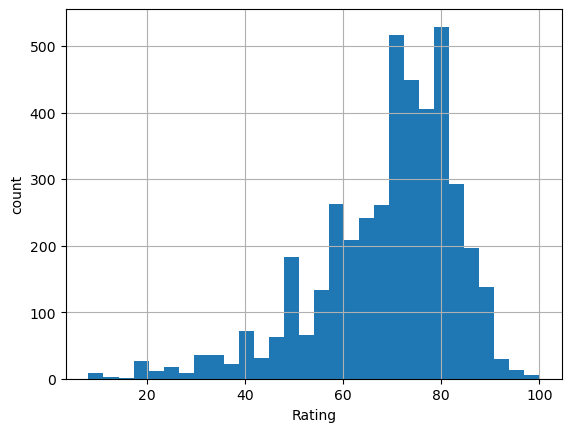

In [7]:
IGDB.total_rating.hist(bins=30)
plt.xlabel('Rating')
plt.ylabel('count');

### Diving into platforms 

In [8]:
IGDB.platforms 

0                 [5, 8]
1                [8, 21]
2         [6, 8, 11, 21]
3             [5, 8, 38]
4                    [6]
              ...       
4260      [7, 9, 32, 52]
4261                [20]
4262          [3, 6, 14]
4263    [52, 59, 66, 70]
4264                [21]
Name: platforms, Length: 4265, dtype: object

In [9]:
IGDB['platforms'].value_counts()

[6]                                          453
[3, 6, 14]                                   147
[6, 9, 12]                                   133
[6, 14]                                      131
[5]                                          108
                                            ... 
[5, 6, 29]                                     1
[3, 6, 9, 14, 15, 34, 38, 39, 46, 72, 82]      1
[5, 6, 9, 12, 34, 39, 73]                      1
[6, 11, 21, 23]                                1
[52, 59, 66, 70]                               1
Name: platforms, Length: 1141, dtype: int64

In [10]:
platforms_info = pd.read_csv('platforms_info.csv', dtype={'id': str})

In [11]:
platforms_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        200 non-null    int64  
 1   id                200 non-null    object 
 2   alternative_name  102 non-null    object 
 3   category          190 non-null    float64
 4   created_at        200 non-null    int64  
 5   name              200 non-null    object 
 6   platform_logo     147 non-null    float64
 7   slug              200 non-null    object 
 8   updated_at        200 non-null    int64  
 9   url               200 non-null    object 
 10  versions          200 non-null    object 
 11  websites          93 non-null     object 
 12  checksum          200 non-null    object 
 13  generation        92 non-null     float64
 14  platform_family   49 non-null     float64
 15  abbreviation      107 non-null    object 
 16  summary           7 non-null      object 
dt

In [12]:
platforms_info.head()

,Unnamed: 0,id,alternative_name,category,created_at,name,platform_logo,slug,updated_at,url,versions,websites,checksum,generation,platform_family,abbreviation,summary
0,0,158,Commodore Dynamic Total Vision,6.0,1510012800,Commodore CDTV,292.0,commodore-cdtv,1522972800,https://www.igdb.com/platforms/commodore-cdtv,[223],[26],5d48648e-283c-e2df-df7d-6d3cbc7e0a58,NaN,NaN,NaN,NaN
1,1,339,Kids Computer Pico,1.0,1595808000,Sega Pico,NaN,sega-pico,1595808000,https://www.igdb.com/platforms/sega-pico,[456],NaN,6e867a5b-a071-fc7b-945b-a0622f64a4bc,4.0,3.0,NaN,NaN
2,2,8,PS2,1.0,1297555200,PlayStation 2,254.0,ps2,1414972800,https://www.igdb.com/platforms/ps2,"[58, 114]",NaN,be3e025c-d4ed-b795-443c-a8cb55fbfe17,6.0,1.0,PS2,NaN
3,3,39,NaN,4.0,1317686400,iOS,248.0,ios,1391644800,https://www.igdb.com/platforms/ios,[43],NaN,fefe4a2b-7c90-0e89-e811-902ea1cf2b58,NaN,NaN,iOS,NaN
4,4,94,NaN,6.0,1414195200,Commodore Plus/4,310.0,c-plus-4,1468454400,https://www.igdb.com/platforms/c-plus-4,[108],NaN,ea138789-6bbe-bcca-dff5-7e20e762f65a,NaN,NaN,C+4,NaN


In [13]:
platforms_info.columns

Index(['Unnamed: 0', 'id', 'alternative_name', 'category', 'created_at',
       'name', 'platform_logo', 'slug', 'updated_at', 'url', 'versions',
       'websites', 'checksum', 'generation', 'platform_family', 'abbreviation',
       'summary'],
      dtype='object')

In [14]:
platforms_info = platforms_info.drop(['Unnamed: 0'], axis=1)

In [15]:
platforms_info.columns

Index(['id', 'alternative_name', 'category', 'created_at', 'name',
       'platform_logo', 'slug', 'updated_at', 'url', 'versions', 'websites',
       'checksum', 'generation', 'platform_family', 'abbreviation', 'summary'],
      dtype='object')

In [16]:
# Remove extra columns 
platforms_info = platforms_info.drop(['alternative_name', 'created_at', 'platform_logo', 'slug', 'updated_at', 'url', 'versions', 'websites', 'checksum', 'generation', 'platform_family', 'summary'],  axis=1)

In [17]:
platforms_info

,id,category,name,abbreviation
0,158,6.0,Commodore CDTV,NaN
1,339,1.0,Sega Pico,NaN
2,8,1.0,PlayStation 2,PS2
3,39,4.0,iOS,iOS
4,94,6.0,Commodore Plus/4,C+4
...,...,...,...,...
195,386,1.0,Meta Quest 2,Meta Quest 2
196,390,1.0,PlayStation VR2,PSVR2
197,165,1.0,PlayStation VR,PlayStation VR
198,47,3.0,Virtual Console,VC


In [18]:
# Verify id uniqueness 
platforms_info[['name', 'id']].nunique()

name    200
id      200
dtype: int64

In [19]:
# API indicates 6 categories 
platforms_info[['category']].nunique()

category    6
dtype: int64

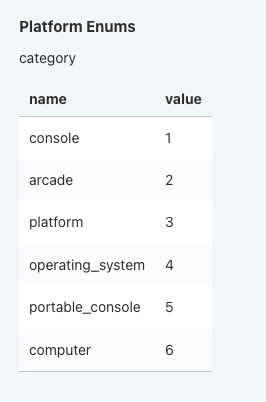

In [20]:
# Checking for number of id's within each category
platforms_info['category'].value_counts()

1.0    80
6.0    55
5.0    34
4.0    10
3.0     8
2.0     3
Name: category, dtype: int64

In [21]:
# Our top value count for single IGDB[platforms] was platforms=6 with 453 games only realeased for that platform. 
# Lets see what platform id does 6 belong in the platform categories:
platforms_info[platforms_info['id'] == 6]

,id,category,name,abbreviation


In [22]:
# What are some of the actual platforms within each category
platforms_info[platforms_info['category'] == 1.0]

,id,category,name,abbreviation
1,339,1.0,Sega Pico,NaN
2,8,1.0,PlayStation 2,PS2
5,144,1.0,AY-3-8710,NaN
6,88,1.0,Odyssey,odyssey
11,68,1.0,ColecoVision,colecovision
...,...,...,...,...
194,29,1.0,Sega Mega Drive/Genesis,Genesis/MegaDrive
195,386,1.0,Meta Quest 2,Meta Quest 2
196,390,1.0,PlayStation VR2,PSVR2
197,165,1.0,PlayStation VR,PlayStation VR


In [23]:
platforms_info[platforms_info['category'] == 2.0]

,id,category,name,abbreviation
15,135,2.0,Hyper Neo Geo 64,NaN
129,79,2.0,Neo Geo MVS,neogeomvs
143,52,2.0,Arcade,Arcade


In [24]:
platforms_info[platforms_info['category'] == 3.0]

,id,category,name,abbreviation
50,132,3.0,Amazon Fire TV,NaN
71,82,3.0,Web browser,browser
73,113,3.0,OnLive Game System,NaN
121,377,3.0,Plug & Play,NaN
134,170,3.0,Google Stadia,Stadia
166,372,3.0,OOParts,NaN
176,389,3.0,AirConsole,NaN
198,47,3.0,Virtual Console,VC


In [25]:
platforms_info[platforms_info['category'] == 4.0]

,id,category,name,abbreviation
3,39,4.0,iOS,iOS
9,6,4.0,PC (Microsoft Windows),PC
44,13,4.0,DOS,DOS
92,14,4.0,Mac,Mac
95,34,4.0,Android,Android
99,73,4.0,BlackBerry OS,blackberry
125,74,4.0,Windows Phone,Win Phone
144,3,4.0,Linux,Linux
177,405,4.0,Windows Mobile,NaN
184,417,4.0,Palm OS,NaN


In [26]:
platforms_info[platforms_info['category'] == 5.0]

,id,category,name,abbreviation
10,44,5.0,Tapwave Zodiac,zod
14,378,5.0,Gamate,NaN
24,381,5.0,Playdate,NaN
26,123,5.0,WonderSwan Color,NaN
28,35,5.0,Sega Game Gear,Game Gear
31,89,5.0,Microvision,microvision
45,124,5.0,SwanCrystal,NaN
54,159,5.0,Nintendo DSi,NaN
55,119,5.0,Neo Geo Pocket,NaN
63,24,5.0,Game Boy Advance,GBA


In [27]:
platforms_info[platforms_info['category'] == 6.0]

,id,category,name,abbreviation
0,158,6.0,Commodore CDTV,NaN
4,94,6.0,Commodore Plus/4,C+4
7,90,6.0,Commodore PET,cpet
8,237,6.0,Sol-20,NaN
12,129,6.0,Texas Instruments TI-99,ti-99
13,134,6.0,Acorn Electron,NaN
16,156,6.0,Thomson MO5,NaN
17,133,6.0,Odyssey 2 / Videopac G7000,NaN
23,25,6.0,Amstrad CPC,ACPC
32,150,6.0,Turbografx-16/PC Engine CD,NaN


Given that there are 200 unique platforms id/names available, we will use the pre-divided categories to group the games in the IGDB df. 
The IGDB df, however, only provides the unique ids for platforms and not the grouped category enum. We will use both datasets (IGDB and platforms) to provide new columns based on the platform category the games can be played on. 

In [28]:
IGDB['console'] = IGDB['platforms'].map(lambda x: len(set(platforms_info[platforms_info['category'] == 1.0]['id'].tolist()).intersection(set(x)))>0 if pd.notnull(x) else np.nan).astype(float)

In [29]:
IGDB['arcade'] = IGDB['platforms'].map(lambda x: len(set(platforms_info[platforms_info['category'] == 2.0]['id'].tolist()).intersection(set(x)))>0 if pd.notnull(x) else np.nan).astype(float)

In [30]:
IGDB['platform'] = IGDB['platforms'].map(lambda x: len(set(platforms_info[platforms_info['category'] == 3.0]['id'].tolist()).intersection(set(x)))>0 if pd.notnull(x) else np.nan).astype(float)

In [31]:
IGDB['operating_system'] = IGDB['platforms'].map(lambda x: len(set(platforms_info[platforms_info['category'] == 4.0]['id'].tolist()).intersection(set(x)))>0 if pd.notnull(x) else np.nan).astype(float)

In [32]:
IGDB['portable_console'] = IGDB['platforms'].map(lambda x: len(set(platforms_info[platforms_info['category'] == 5.0]['id'].tolist()).intersection(set(x)))>0 if pd.notnull(x) else np.nan).astype(float)

In [33]:
IGDB['computer'] = IGDB['platforms'].map(lambda x: len(set(platforms_info[platforms_info['category'] == 6.0]['id'].tolist()).intersection(set(x)))>0 if pd.notnull(x) else np.nan).astype(float)

In [34]:
#Checking that all new columns are in df 
IGDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4265 entries, 0 to 4264
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   4265 non-null   int64         
 1   age_ratings          3715 non-null   object        
 2   category             4265 non-null   int64         
 3   collection           3153 non-null   float64       
 4   cover                4263 non-null   float64       
 5   created_at           4265 non-null   int64         
 6   external_games       4245 non-null   object        
 7   first_release_date   4261 non-null   datetime64[ns]
 8   follows              3462 non-null   float64       
 9   game_modes           4223 non-null   object        
 10  genres               4243 non-null   object        
 11  involved_companies   4232 non-null   object        
 12  keywords             4046 non-null   object        
 13  name                 4265 non-nul

In [71]:
#Console 
IGDB['console'].value_counts()

1.0    3369
0.0     895
Name: console, dtype: int64

In [72]:
#Arcade 
IGDB['arcade'].value_counts()

0.0    4264
Name: arcade, dtype: int64

In [73]:
#Platform
IGDB['platform'].value_counts()

0.0    4264
Name: platform, dtype: int64

In [74]:
#Operating systems 
IGDB['operating_system'].value_counts()

1.0    2931
0.0    1333
Name: operating_system, dtype: int64

In [75]:
#Portable console
IGDB['portable_console'].value_counts()

0.0    4264
Name: portable_console, dtype: int64

In [76]:
#Computer
IGDB['computer'].value_counts()

0.0    4264
Name: computer, dtype: int64

## Total rating 

Previously we checked the balance of rating while cleaning up the df but we used ratings as our feature. After some more cleaning we determined the ideal feature column is total_ratings, therefore, we will analyse this balance again with the proper column. 

In [35]:
import numpy as np 
IGDB['total_rating'] = np.round(IGDB['total_rating'], decimals=0)

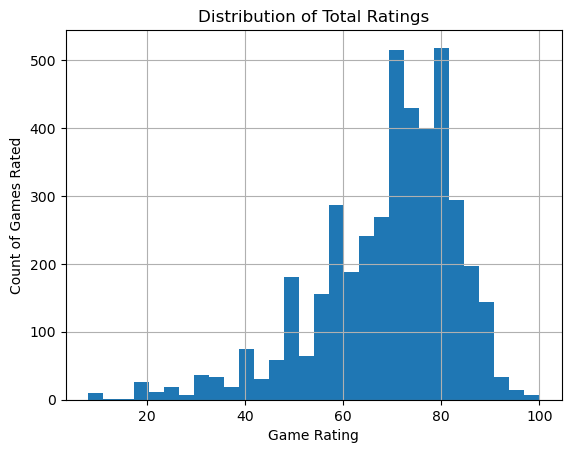

In [36]:
#Total rating distribution
IGDB.total_rating.hist(bins=30)
plt.title('Distribution of Total Ratings')
plt.xlabel('Game Rating')
plt.ylabel('Count of Games Rated');

In [37]:
IGDB[(IGDB['total_rating'] > 70)]

,id,age_ratings,category,collection,cover,created_at,external_games,first_release_date,follows,game_modes,...,checksum,total_rating,total_rating_count,rating_count,console,arcade,platform,operating_system,portable_console,computer
2,1341,"[4566, 34569, 94567, 94629, 123277, 131429]",0,361.0,123347.0,1348912750,"[14669, 76711, 95250, 142618, 188993, 216380, ...",2003-11-11,157.0,[1],...,df73e0a4-35da-fbf1-1d81-b8a1d7c831d0,88.0,309.0,303.0,1.0,0.0,0.0,1.0,0.0,0.0
5,1185,"[7927, 30269]",0,268.0,239961.0,1341705832,"[48948, 79267, 150305, 189835, 245608]",1996-09-09,141.0,[1],...,b8cb3811-47f3-76a3-6506-81bf5e0a08c1,78.0,529.0,528.0,1.0,0.0,0.0,1.0,0.0,0.0
6,180,"[5861, 36579]",0,NaN,141217.0,1300188110,"[137809, 188970, 1918777]",1995-04-30,49.0,[1],...,83a1ae23-4c47-c073-6c9e-a8c6b27ea55c,85.0,140.0,139.0,1.0,0.0,0.0,1.0,0.0,0.0
7,1881,"[31871, 44361, 74569]",0,117.0,94416.0,1358621353,"[13380, 39715, 81127, 124909, 245112]",2013-09-12,48.0,"[1, 2, 3]",...,6fefd755-eb31-c27c-97fa-ac43ddb87452,74.0,99.0,92.0,1.0,0.0,0.0,1.0,0.0,0.0
8,4650,[48386],0,195.0,185455.0,1390984470,"[56042, 81701, 128672, 213987, 246417, 403208,...",2010-09-30,16.0,"[1, 2, 3]",...,fce1069a-a376-25af-b3a8-70c176412a4f,75.0,80.0,74.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,2688,"[12968, 44350, 47188, 116915, 116916, 116917, ...",0,521.0,182144.0,1374420740,"[35738, 137873, 215968, 246869, 1932176, 19322...",2008-11-16,9.0,"[1, 2]",...,015f28d4-a000-b315-c806-28e6e6af4e44,74.0,66.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0
4259,2178,"[12650, 36305, 47134, 80726, 96235]",0,6124.0,95671.0,1372169682,"[35547, 72897, 132732, 189635, 219233, 245451,...",2009-11-12,71.0,"[1, 2, 3]",...,a4e36bf3-7f4a-675b-f9a9-1bfeb99ce245,82.0,257.0,251.0,1.0,0.0,0.0,0.0,0.0,0.0
4260,1665,[78989],0,6845.0,280604.0,1351448362,"[18891, 136634, 1921006]",1995-11-01,2.0,"[1, 2]",...,94c7f9aa-7e6b-8697-0996-fece3a98d3c9,84.0,7.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0
4263,2391,NaN,0,2142.0,232992.0,1372862273,"[19503, 153373, 1192382]",1980-11-12,1.0,[1],...,52647d4e-5542-3e92-b490-d027568f8155,71.0,17.0,16.0,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
IGDB[(IGDB['total_rating'] < 70)]

,id,age_ratings,category,collection,cover,created_at,external_games,first_release_date,follows,game_modes,...,checksum,total_rating,total_rating_count,rating_count,console,arcade,platform,operating_system,portable_console,computer
0,7995,[66005],0,3138.0,199764.0,1414716913,"[52206, 132934, 1746061, 1921468]",2007-03-11,NaN,[1],...,a17db3a2-98e7-fff0-1310-2dd6cd7f21d7,65.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0
1,4221,[58455],0,687.0,161022.0,1390750383,"[51645, 143610, 1709454]",2002-06-03,NaN,"[1, 4]",...,0495aef1-a71b-9630-181f-bf0674876f2a,60.0,2.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0
3,4967,"[66179, 66256]",0,NaN,329337.0,1391651125,"[35778, 128039, 247067]",2007-05-01,NaN,"[1, 4]",...,e4c37e48-ce6e-2c17-b45a-de60b59cd9c3,30.0,1.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0
10,585,[72472],0,NaN,166932.0,1317745722,"[15077, 80531, 94756, 149471, 1708390, 2624341]",1997-07-04,1.0,"[1, 2]",...,ac050937-843e-942d-b0b6-2ecb845120e5,60.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
11,1091,"[28100, 28101, 68358]",0,6069.0,136185.0,1340040817,"[31882, 149554, 217178, 249943, 2595477]",1995-06-26,5.0,[1],...,f9441905-ef99-aeea-38e1-852749636a3e,66.0,20.0,20.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,8733,NaN,0,NaN,138707.0,1421915934,"[115673, 184306, 1186070]",2017-08-22,5.0,"[2, 5]",...,79f8c14b-508d-5b6b-018a-b9b828f44838,60.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4253,1648,[48365],0,326.0,130431.0,1351021394,"[25777, 80253, 127862, 213663, 248417, 1304018...",2010-11-02,21.0,"[1, 2]",...,befb5201-c6c9-96f4-b768-0fcc3bff6343,64.0,58.0,46.0,1.0,0.0,0.0,1.0,0.0,0.0
4256,4062,[2095],0,2095.0,111428.0,1390438345,"[35030, 145773, 1747863, 1872132]",2003-12-03,1.0,"[1, 2, 4]",...,413730cd-35e5-a89b-29a7-987668c92f9c,67.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4261,7906,[71758],0,931.0,139393.0,1414526383,"[131300, 188981, 1806025, 1921752]",2008-10-14,NaN,[1],...,741c5e6e-ed9f-2b9d-f859-d93c9d13ac71,30.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#Calculate rating per voter
rating_per_voter = IGDB['total_rating'].groupby(IGDB['total_rating_count'])
rating_per_voter.head()

0       65.0
1       60.0
2       88.0
3       30.0
4       70.0
        ... 
4221    70.0
4233    81.0
4236    85.0
4242    81.0
4259    82.0
Name: total_rating, Length: 1072, dtype: float64

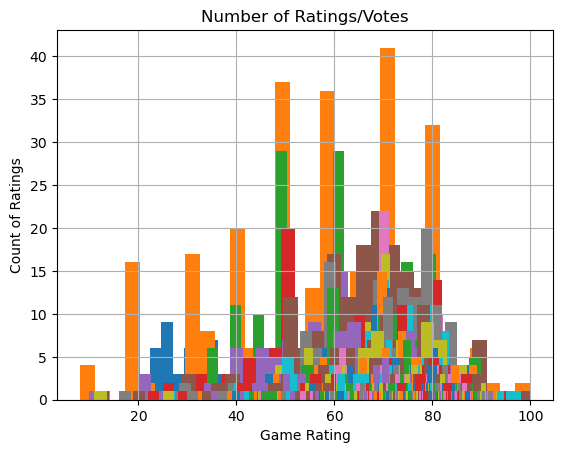

In [40]:
#Total rating count (Total number of user and external critic scores) distribution. 
rating_per_voter.hist(bins=30)
plt.title('Number of Ratings/Votes')
plt.xlabel('Game Rating')
plt.ylabel('Count of Ratings');

In [41]:
# Games with at least 10 ratings/votes 
IGDB[(IGDB['total_rating_count'] > 10)]

,id,age_ratings,category,collection,cover,created_at,external_games,first_release_date,follows,game_modes,...,checksum,total_rating,total_rating_count,rating_count,console,arcade,platform,operating_system,portable_console,computer
2,1341,"[4566, 34569, 94567, 94629, 123277, 131429]",0,361.0,123347.0,1348912750,"[14669, 76711, 95250, 142618, 188993, 216380, ...",2003-11-11,157.0,[1],...,df73e0a4-35da-fbf1-1d81-b8a1d7c831d0,88.0,309.0,303.0,1.0,0.0,0.0,1.0,0.0,0.0
5,1185,"[7927, 30269]",0,268.0,239961.0,1341705832,"[48948, 79267, 150305, 189835, 245608]",1996-09-09,141.0,[1],...,b8cb3811-47f3-76a3-6506-81bf5e0a08c1,78.0,529.0,528.0,1.0,0.0,0.0,1.0,0.0,0.0
6,180,"[5861, 36579]",0,NaN,141217.0,1300188110,"[137809, 188970, 1918777]",1995-04-30,49.0,[1],...,83a1ae23-4c47-c073-6c9e-a8c6b27ea55c,85.0,140.0,139.0,1.0,0.0,0.0,1.0,0.0,0.0
7,1881,"[31871, 44361, 74569]",0,117.0,94416.0,1358621353,"[13380, 39715, 81127, 124909, 245112]",2013-09-12,48.0,"[1, 2, 3]",...,6fefd755-eb31-c27c-97fa-ac43ddb87452,74.0,99.0,92.0,1.0,0.0,0.0,1.0,0.0,0.0
8,4650,[48386],0,195.0,185455.0,1390984470,"[56042, 81701, 128672, 213987, 246417, 403208,...",2010-09-30,16.0,"[1, 2, 3]",...,fce1069a-a376-25af-b3a8-70c176412a4f,75.0,80.0,74.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,8978,"[8936, 33069, 95715]",0,NaN,253181.0,1423338821,"[23887, 80263, 80264, 80265, 124118, 224534, 2...",2011-09-01,16.0,[1],...,6f266d2a-f7ed-62f4-9038-986288294d3e,70.0,70.0,67.0,1.0,0.0,0.0,1.0,0.0,0.0
4258,2688,"[12968, 44350, 47188, 116915, 116916, 116917, ...",0,521.0,182144.0,1374420740,"[35738, 137873, 215968, 246869, 1932176, 19322...",2008-11-16,9.0,"[1, 2]",...,015f28d4-a000-b315-c806-28e6e6af4e44,74.0,66.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0
4259,2178,"[12650, 36305, 47134, 80726, 96235]",0,6124.0,95671.0,1372169682,"[35547, 72897, 132732, 189635, 219233, 245451,...",2009-11-12,71.0,"[1, 2, 3]",...,a4e36bf3-7f4a-675b-f9a9-1bfeb99ce245,82.0,257.0,251.0,1.0,0.0,0.0,0.0,0.0,0.0
4263,2391,NaN,0,2142.0,232992.0,1372862273,"[19503, 153373, 1192382]",1980-11-12,1.0,[1],...,52647d4e-5542-3e92-b490-d027568f8155,71.0,17.0,16.0,1.0,0.0,0.0,1.0,0.0,0.0


In [56]:
Top_ranked_games = IGDB[(IGDB['total_rating'] > 85)]

In [61]:
Top_ranked_games.sort_values('total_rating', ascending=False)

,id,age_ratings,category,collection,cover,created_at,external_games,first_release_date,follows,game_modes,...,total_rating,total_rating_count,rating_count,console,arcade,platform,operating_system,portable_console,computer,year
3440,4933,[66342],0,NaN,247011.0,1391638635,"[36696, 125862, 1747366, 1922475]",2007-12-18,NaN,"[1, 4]",...,100.0,3.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,2007
2645,8863,[123909],2,124.0,288817.0,1422751181,"[76584, 2013846]",2014-09-18,1.0,"[1, 2]",...,100.0,5.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,2014
3996,5024,[70559],0,NaN,291442.0,1391723503,"[35807, 133942, 221050, 1921357]",2009-05-27,1.0,[1],...,100.0,4.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,2009
1790,804,[65512],0,147.0,117125.0,1317749153,"[38464, 151680, 246460]",2003-02-13,NaN,"[1, 2]",...,100.0,1.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,2003
1695,9186,[78895],0,5070.0,161319.0,1425228270,"[49416, 150140, 252307]",1996-11-30,NaN,"[1, 2]",...,100.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,734,[67490],0,143.0,104483.0,1317748973,"[37537, 145478, 251868, 2519866]",2000-06-01,3.0,"[1, 2]",...,86.0,16.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,2000
1848,6341,NaN,0,3926.0,138341.0,1398118730,"[38617, 137454, 189808, 281357, 1712782, 2140547]",2006-08-08,19.0,[1],...,86.0,47.0,47.0,1.0,0.0,0.0,1.0,0.0,0.0,2006
1623,5082,"[7308, 44468, 123478]",0,1024.0,107483.0,1391822961,"[12773, 38758, 74202, 122122, 245351, 260437, ...",2014-06-30,61.0,"[1, 2, 3]",...,86.0,190.0,179.0,1.0,0.0,0.0,1.0,0.0,0.0,2014
1816,981,"[1329, 94600, 96333, 104241, 105271, 111430, 1...",0,206.0,87104.0,1321470315,"[13174, 73696, 77822, 82125, 82127, 88826, 931...",2011-11-15,117.0,"[1, 2, 3]",...,86.0,323.0,314.0,1.0,0.0,0.0,1.0,0.0,0.0,2011


In [62]:
Top_ranked_games[(Top_ranked_games['total_rating_count'] > 30)]

,id,age_ratings,category,collection,cover,created_at,external_games,first_release_date,follows,game_modes,...,total_rating,total_rating_count,rating_count,console,arcade,platform,operating_system,portable_console,computer,year
890,1103,"[28526, 31930, 47404, 48829]",0,243.0,265426.0,1340045243,"[57113, 149467, 220739, 245374, 2594212, 2596097]",1994-03-19,264.0,[1],...,97.0,753.0,752.0,1.0,0.0,0.0,1.0,0.0,0.0,1994
3260,1026,"[49238, 62228, 82546, 90794, 112318]",0,106.0,181427.0,1326319522,"[57183, 147652, 221007, 245236, 1931513, 25941...",1991-11-21,454.0,[1],...,96.0,1256.0,1255.0,1.0,0.0,0.0,1.0,0.0,0.0,1991
2258,6036,"[44202, 44203, 47774, 47775, 47776, 47777, 47778]",9,864.0,279388.0,1397300134,"[55108, 83678, 189865, 401689, 1865823, 192831...",2014-07-26,486.0,"[1, 2]",...,96.0,1217.0,1206.0,1.0,0.0,0.0,0.0,0.0,0.0,2014
2146,1454,[63628],0,304.0,90946.0,1349604206,"[48928, 147801, 245919, 401406]",1998-12-17,33.0,[1],...,96.0,90.0,89.0,1.0,0.0,0.0,1.0,0.0,0.0,1998
2048,1070,"[31815, 33716, 47151, 47393, 50775]",0,6128.0,287686.0,1339251438,"[31196, 155790, 188859, 220734, 245175, 192959...",1990-11-21,544.0,"[1, 2]",...,96.0,1403.0,1402.0,1.0,0.0,0.0,1.0,0.0,0.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,5413,"[28594, 28595, 28596]",0,709.0,79190.0,1392605973,"[51403, 74021, 151162, 249643, 400592, 402342,...",2001-06-18,9.0,"[1, 2, 3, 4]",...,86.0,35.0,34.0,1.0,0.0,0.0,0.0,0.0,0.0,2001
976,295,"[12766, 79675, 79691]",0,138.0,77652.0,1300351525,"[37473, 156771, 247559]",1996-11-22,102.0,"[1, 2]",...,86.0,277.0,277.0,1.0,0.0,0.0,1.0,0.0,0.0,1996
2434,2194,"[29517, 29518, 48915, 50759, 50760, 50761]",8,452.0,113006.0,1372260340,"[135342, 219775, 1930616, 2594204]",2009-05-18,10.0,"[1, 2, 4]",...,86.0,45.0,39.0,1.0,0.0,0.0,0.0,0.0,0.0,2009
510,717,"[16805, 16806]",0,202.0,119491.0,1317748923,"[38837, 129099, 251320, 2663161]",2010-11-05,5.0,"[1, 2]",...,86.0,32.0,28.0,1.0,0.0,0.0,1.0,0.0,0.0,2010


In [66]:
Bottom_ranked_games = IGDB[(IGDB['total_rating'] < 50)]

In [69]:
Bottom_ranked_games.sort_values('total_rating', ascending=False)

,id,age_ratings,category,collection,cover,created_at,external_games,first_release_date,follows,game_modes,...,total_rating,total_rating_count,rating_count,console,arcade,platform,operating_system,portable_console,computer,year
2095,2761,[61815],0,3114.0,311594.0,1374902712,"[33210, 139990, 248299]",2001-11-05,1.0,[1],...,49.0,9.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,2001
2557,9461,"[8087, 8088]",0,155.0,96128.0,1428189879,"[13948, 128510, 223749, 1187472]",2011-10-25,4.0,"[1, 2]",...,49.0,21.0,18.0,1.0,0.0,0.0,1.0,0.0,0.0,2011
606,9776,"[11638, 65800]",0,1336.0,81126.0,1429139763,"[13782, 40162, 142174, 281375]",2004-06-24,NaN,[1],...,49.0,8.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,2004
215,7256,"[4201, 4202, 66974, 66975]",0,NaN,276342.0,1401988000,"[14892, 84715, 92375, 100147, 137670, 214387, ...",2007-11-01,6.0,[1],...,49.0,27.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,2007
247,3181,NaN,0,2793.0,7904.0,1384816352,"[28369, 1951516]",2013-11-18,NaN,[1],...,49.0,1.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,2649,NaN,0,NaN,224894.0,1374359051,"[121938, 248991]",2014-09-18,4.0,"[1, 2]",...,10.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,2014
3608,3778,[1858],0,625.0,112984.0,1390055155,"[13298, 38379, 84651, 96488, 123450, 253143]",2011-12-13,1.0,"[1, 2, 3]",...,10.0,14.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,2011
3958,8538,[5896],0,NaN,276541.0,1421117960,"[47896, 142277, 1920158]",1997-02-01,1.0,[1],...,10.0,1.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1997
57,6573,"[55745, 66135]",0,NaN,161500.0,1398915807,"[36605, 138839, 216266, 1920669]",2007-09-27,NaN,NaN,...,10.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,2007


In [70]:
Bottom_ranked_games[(Bottom_ranked_games['total_rating_count'] > 30)]

,id,age_ratings,category,collection,cover,created_at,external_games,first_release_date,follows,game_modes,...,total_rating,total_rating_count,rating_count,console,arcade,platform,operating_system,portable_console,computer,year
70,7857,"[7912, 77428]",0,NaN,76121.0,1413537530,"[9642, 96785, 113078]",2015-06-01,14.0,[1],...,47.0,48.0,44.0,0.0,0.0,0.0,1.0,0.0,0.0,2015
122,1021,"[24599, 32668, 74255, 98462, 98463]",0,3039.0,130290.0,1326204897,"[13893, 62566, 72497, 78779, 94438, 94439, 138...",2013-02-12,19.0,"[1, 2, 3, 4]",...,46.0,93.0,77.0,1.0,0.0,0.0,1.0,0.0,0.0,2013
328,4105,"[2136, 13912]",0,NaN,86439.0,1390529287,"[24424, 139363, 220173, 246670]",2005-11-15,14.0,"[1, 4]",...,47.0,82.0,80.0,1.0,0.0,0.0,0.0,0.0,0.0,2005
939,1831,[49596],0,3028.0,70890.0,1355062562,"[26178, 83854, 121704, 214263, 221111, 248685,...",2013-03-19,10.0,[1],...,33.0,35.0,33.0,1.0,0.0,0.0,1.0,0.0,0.0,2013
1101,1813,"[39011, 51955, 97513]",8,7988.0,89802.0,1352642737,"[30233, 135212, 246131, 268469, 2058690, 25175...",2005-12-31,10.0,[1],...,40.0,34.0,33.0,1.0,0.0,0.0,1.0,0.0,0.0,2005
1267,4905,"[2555, 45694]",0,1502.0,93826.0,1391565022,"[25364, 80087, 127758, 251333, 1304233, 174725...",2011-07-12,16.0,[1],...,38.0,31.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,2011
2333,7671,NaN,0,4025.0,231496.0,1408780906,"[16715, 115759, 189761, 249392]",2013-05-24,7.0,[1],...,49.0,44.0,44.0,1.0,0.0,0.0,1.0,0.0,0.0,2013
2406,6231,[78591],0,2156.0,93146.0,1398028477,"[25277, 82911, 82913, 138340, 189341, 214161, ...",2006-11-14,13.0,"[1, 2]",...,28.0,104.0,102.0,1.0,0.0,0.0,0.0,0.0,0.0,2006
2413,1257,[76958],0,2950.0,320563.0,1342990578,"[28656, 148970, 220422, 1870374]",1998-12-12,5.0,"[1, 2]",...,47.0,40.0,39.0,1.0,0.0,0.0,1.0,0.0,0.0,1998
2468,6706,[16372],0,3749.0,6847.0,1399293289,"[59167, 137453, 1188834]",1982-12-01,2.0,[1],...,49.0,31.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,1982


## Release date
We will look into the release years of each game to identify any relation with the release date and the rating of a game. Also, given that we want to forecast what game that will be released in the next two years will have high rating, we will make sure upcoming release games are not included in the model for training to not overfit to the results. 

In [43]:
IGDB['year'] = IGDB['first_release_date'].dt.year

In [44]:
IGDB['year'] = IGDB['year'].fillna(0).astype(int)

In [45]:
IGDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4265 entries, 0 to 4264
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   4265 non-null   int64         
 1   age_ratings          3715 non-null   object        
 2   category             4265 non-null   int64         
 3   collection           3153 non-null   float64       
 4   cover                4263 non-null   float64       
 5   created_at           4265 non-null   int64         
 6   external_games       4245 non-null   object        
 7   first_release_date   4261 non-null   datetime64[ns]
 8   follows              3462 non-null   float64       
 9   game_modes           4223 non-null   object        
 10  genres               4243 non-null   object        
 11  involved_companies   4232 non-null   object        
 12  keywords             4046 non-null   object        
 13  name                 4265 non-nul

In [46]:
IGDB['year'].nunique()

48

In [78]:
counts_per_year = IGDB['year'].value_counts().sort_index()

In [85]:
counts_per_year = counts_per_year.drop(0)

<AxesSubplot:ylabel='year'>

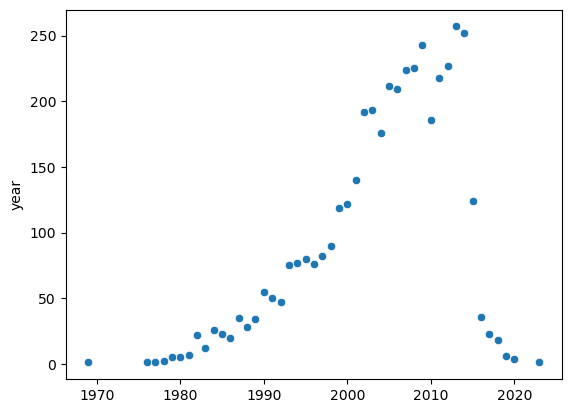

In [86]:
sns.scatterplot(data=counts_per_year)

We do not have any games being released 2024 or 2025 in the dataset so we can continue with current set. 

## Summary 
- The original cleaned df provided us with some information about the platform each game can be played on. However, these came as a list form and contained from 1 unique platform to more than 11 unique platforms per game. Given that multiple games have been released to be played in 1 or more platforms, we used IGDBs pre-set platform enums for 6 different platform categories that they are a part of the following breakdown: 
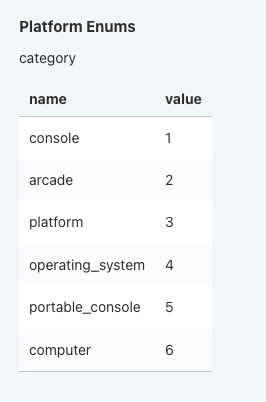

- There are a total of 200 unique platforms overall. Within each category we found the following: 
    - Category 1 contains 80 unique console platforms  ( Sega Pico, PS2, Meta Quest, Odyssey, etc.)
    - Category 2 contain 3 unique Arcade platforms (Hyper Neo Geo 64, Neo Geo MVS, and Arcade)
    - Category 3 contain 8 unique platform (Amazon Fire TV, Web browser, Google Stadia, AirConsole, etc.)
    - Category 4 contain 10 unique operating_system platforms (iOS, PC=Microsoft Windows, Mac, Android, Linux, etc.)
    - Category 5 contain 34 unique portable_console platforms (Gamate, Playdate, Sega Game Gear, Nintendo DSi/3DS/DS, Game Boy, PSP, etc.)
    - Category 6 contain 55 unique computer platforms (Commodore CDTV/Plus4/PET/16, Atari 8-bit, Amiga, Apple II, HP 2100/3000, etc.)
- We found our game data has the following spread of platfomr category: 
    - Console found in 3369 games 
    - Arcade, Platform, Portable Console, and Computer found 0 
    - Operating system found 2931 games. 
    
    
- Previously we also checked the balance of rating when cleaning up the data. However, after cleaning we noticed that the proper column to use as feature is 'total_rating' vs 'rating'. We verified the balance one more time using the correct column. Using a higher rating expectation for top games (over 70 in total rating) we foud a better balance at 1713 games under the threshold and 2275 games above the 70 total_ranking value. 
- We also dove deeper into rating and looked at games with over 30 votes/rating. There was clearly some change along the rating value, the higher the rating the more votes per game and viceversa. 
    - 315 games have higher than 85 rating but only 200 of them have over 30 votes/rating.
    - 373 games have a lower than 50 rating but only 13 of those have over 30 votes/rating.

- Lastly looking at years released, we verified we did not have any game that was being released in the next couple years. We also identified that the year with the most releases was 2013 with 257 games and that the oldest game released on file is 1969. The spread of years is 54. 